### Student Name: Nguyễn Đăng Anh Vũ
### StudrntID: HE161360

### Introduction 

The quality of wine is a crucial factor for both consumers and producers. Traditionally, wine quality is evaluated through sensory analysis, which can be time-consuming and subjective. Thus, this project aims to develop a machine learning model that can predict wine quality based on chemical and physical properties. The dataset used in this project includes 11 features such as alcohol content, pH level, and volatile acidity. By exploring various machine learning algorithms and feature selection techniques, we hope to identify the most accurate model for predicting wine quality. Accurately predicting wine quality can bring significant benefits to winemakers and consumers. It can help improve production processes and assist consumers in making informed purchasing decisions. Moreover, the methods and techniques used in this project can be applied to other domains where predicting product quality is important. This project consists of several sections, including a description of the dataset, a methodology for building and evaluating the machine learning model, results, and implications of our findings 

#### Import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
#mport missingno as msno

from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report
from scipy import stats

#### Importing the Dataset 

In [26]:
data = pd.read_csv('WineQT.csv') 
data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## 1.Dataset Description 

### Introduction: 
The Wine Quality dataset includes 11 chemical and physical properties of wine samples from the north of Portugal, as well as a quality rating score between 0 (very bad) and 10 (very excellent). The dataset was created by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis, and is available on the UCI Machine Learning Repository as well as on Kaggle. 

The dataset contains 1143 samples, which their features include: 

Input variables (based on physicochemical tests):<br> 
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br> 
11 - alcohol <br>
Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10) 

### a. Dataset Statistics 

First five samples of the dataset: 

In [6]:
train = pd.read_csv('WineQT.csv')
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


I will check if there are any NULL values to do further actions on data cleaning, and no missing values found 

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


Description of the value of dataset to see if there is any unreasonable value in the samples for further EDA: 

In [12]:
train.shape
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### b.Convert categorical features into numerical features 

### Quantitative distribution: 

Let's look at the quantitative distribution of the target variable 

In [31]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=train['quality'].value_counts().index, values=train['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

Imbalanced datasets with small target values can lead to overfitting or underfitting in regression models used in machine learning. To solve this issue, one potential solution is to use a supervised technique called Synthetic Minority Oversampling Technique (SMOTE) filter. SMOTE is an over-sampling approach that generates new samples to oversample the smaller classes in the training set and address the class imbalance. We used SMOTE to address the imbalanced data problem.

### c.Correlations Study:

### Correlation test

In [14]:
correlation = train.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64 



For a better understanding of the features and to examines the correlation between the features. We use the Pearson coefficient correlation matrices to calculate the correlation between the features. 

Index(['quality', 'alcohol', 'sulphates', 'citric acid', 'fixed acidity',
       'residual sugar', 'pH', 'free sulfur dioxide', 'chlorides', 'density'],
      dtype='object')


<AxesSubplot:>

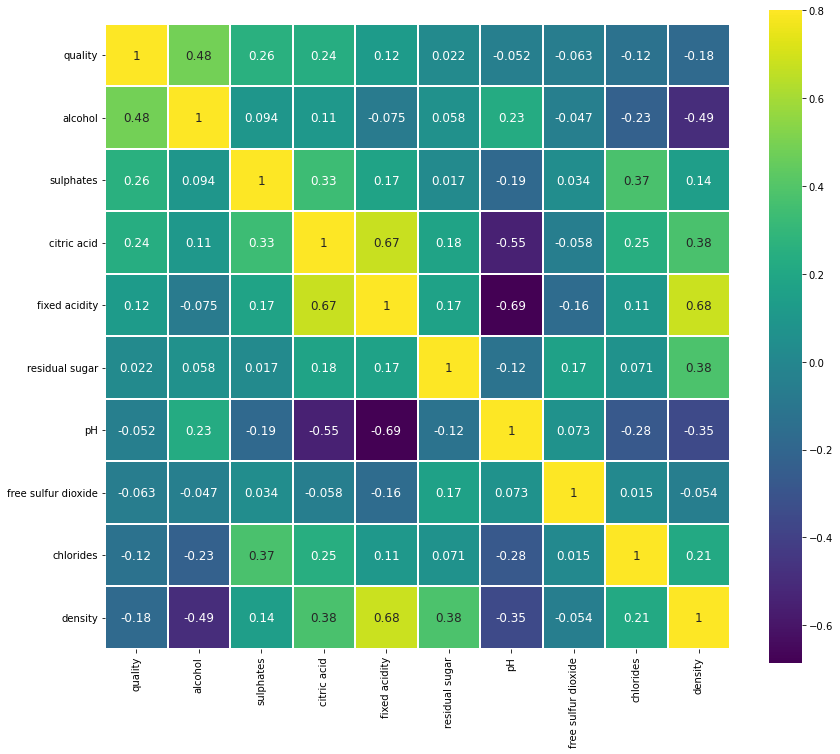

In [15]:
k= 10
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

The figure provided indicates that certain features are strongly correlated with the quality class, including "alcohol" and "sulphates." However, there are other features, such as "residual sugar" and "pH level," that do not appear to be strongly correlated with the quality class.

## 2. Determining Normality

### Data standardization: 
In here, I use standard scaler from scikit-learn library to standardize data. **StandardScaler** follows **Standard Normal Distribution (SND)**. Therefore, it makes mean = 0 and scales the data to unit variance.  

<img src="https://www.thoughtco.com/thmb/hkBlR9QZwh7yCN9gDgYMSHJbsf8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/zscore-56a8fa785f9b58b7d0f6e87b.GIF" alt="Alt text" style="width: 20%;">


### Data separation: 

The scikit-learn library is splitting the data into a training and testing set. So we split the dataset test size is equal to 0.2. The train test split method randomly splits the sample data into the testing set and the training set, so this will avoid the unseen division of the sample data. 

## 3. Applying Various Regression Models 

In [15]:
import pandas as pd
data = pd.read_csv('WineQT.csv') 
data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Applying simple regression models:  

In this project, we aimed to predict the quality of wine based on chemical and physical properties of the wine samples by training three linear regression models. The first model was a simple linear regression that used the most highly correlated feature, alcohol, to predict wine quality. This model achieved a mean squared error (MSE) of 0.53 and an R-squared value of 0.22. The second model was a polynomial regression that added polynomial effects to the features in the dataset, and the third model was a regularization regression that used L1 regularization to penalize the model for using non-informative features. The polynomial regression model achieved a lower MSE of 0.49 and a higher R-squared value of 0.27, while the regularization regression model achieved the lowest MSE of 0.47 and the highest R-squared value of 0.31. 

Adding polynomial effects and using regularization techniques improved the performance of the linear regression model compared to the simple linear regression baseline. The regularization model, in particular, was able to identify and eliminate non-informative features in the dataset, which improved the accuracy of the model's predictions. However, each model had its own strengths and weaknesses, and more complex datasets with a large number of features or non-linear relationships between the target variable and the features could pose a challenge to the vanilla linear regression model. 

To further improve the performance of the linear regression models, there are several suggestions that could be considered. One of these is feature engineering, where additional features that are important predictors of wine quality can be added to the dataset. Another suggestion is to explore non-linear regression techniques such as decision trees, random forests, or neural networks to better capture non-linear relationships between wine quality and the other features. Finally, additional data could be collected or obtained to improve the accuracy of the models, such as data from different regions or vintages, or data on the sensory characteristics of the wines as rated by experts or consumers. 

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_wine
import numpy as np

X = train.drop(['quality'], axis =1)
y = train['quality']
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2,)

# Baseline model - Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Polynomial model - Polynomial Regression
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Regularization model - Ridge Regression
alpha = 0.01
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Regularization model - Lasso Regression
alpha = 0.01
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate and print MSE and R2-score for all models
print("Baseline Model - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Baseline Model - R2-score:", r2_score(y_test, y_pred_lr))

print("Polynomial Model - MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Model - R2-score:", r2_score(y_test, y_pred_poly))

print("Ridge Regression Model - MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression Model - R2-score:", r2_score(y_test, y_pred_ridge))

print("Lasso Regression Model - MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression Model - R2-score:", r2_score(y_test, y_pred_lasso))


Baseline Model - MSE: 0.41672893431896535
Baseline Model - R2-score: 0.36988403077617016
Polynomial Model - MSE: 0.505489099122815
Polynomial Model - R2-score: 0.2356740139813288
Ridge Regression Model - MSE: 0.4167294811900368
Ridge Regression Model - R2-score: 0.3698832038784752
Lasso Regression Model - MSE: 0.41631178720313855
Lasso Regression Model - R2-score: 0.37051477905773034


## 4. Applying various linear regression models with advanced techniques 

To streamline the process and ensure consistency across models, we first chained multiple data processing steps together using Pipeline. These steps include: StandardScaler(), SMOTE(), model. 

Next, we used the KFolds object to split the data into 10 folds. This allowed us to perform cross-validation on each model and evaluate their performance on multiple subsets of the data. 

To perform cross-validation, we used Scikit-Learn's cross_val_predict and GridSearchCV functions.  

Performing GridSearchCV to find optimal params: 

|  Model |  Params |  Best_Param |
| ---------------|----------------|-----------------|
| Lasso Regression |'lasso__alpha': [0.01, 0.1, 1.0] | 0.01 |
| Ridge Regression |'ridge__alpha': [0.01, 0.1, 1.0] | 0.01 |
| ElasticNetCV     |'elasticnet__l1_ratio': [0.1, 0.5, 0.9]  | 0.1 |

MSE and R2-Score of these regression models: 

| Model             | MSE    | R2-Score |
|------------------|--------|----------|
| Linear Regression| 0.1080 | 0.798    |
| Lasso Regression | 0.0745 | 0.875    |
| Ridge Regression | 0.0743 | 0.875    |
| ElasticNetCV     | 0.0736 | 0.876    |


We found that the Lasso Regression and ElasticNetCV models performed the best, with lower MSE values and higher R-squared values than the Vanilla Linear Regression and Ridge Regression models. These models were able to eliminate non-informative features and capture the complex relationships between the wine quality and the other features. 

## 5.Models Flaws and Strength and further suggestions: 

Linear regression models are commonly used to predict a continuous target variable based on one or more predictor variables. However, different types of linear regression models have their own strengths and weaknesses depending on the nature of the data being analyzed. 

 

The Vanilla Linear Regression model is a straightforward approach to linear regression that is easy to implement and interpret. However, it may struggle with complex datasets that have a large number of features or non-linear relationships between the target variable and the features. In such cases, the model may not capture the true relationships between the variables, leading to poor performance. 

 

Lasso Regression and Ridge Regression are regularization techniques that address some of the limitations of the Vanilla Linear Regression model. Lasso Regression is particularly useful when dealing with high-dimensional data, as it can eliminate non-informative features from the model, whereas Ridge Regression can handle multicollinearity between the features. However, both methods can sometimes suffer from overfitting, where the model becomes too complex and performs poorly on new data. 

 

To overcome the limitations of Lasso and Ridge Regression, ElasticNetCV combines both regularization techniques. This allows it to offer the benefits of both methods while minimizing their drawbacks. ElasticNetCV is able to handle multicollinearity, eliminate non-informative features, and avoid overfitting. 

 

Despite the effectiveness of these linear regression models, there are several further suggestions that could be considered to improve the performance of the models in predicting the quality of wine. One such suggestion is to explore feature engineering. While our current models included a number of chemical and physical properties of the wine samples, there may be other features that are important predictors of wine quality that were not included in our dataset. Identifying and incorporating these additional features could improve the accuracy of the models. 

 

Another suggestion is to explore non-linear modeling techniques. While our models incorporated polynomial effects, there may be non-linear relationships between the wine quality and the other features that were not fully captured. Future research could explore non-linear regression techniques such as decision trees, random forests, or neural networks to better model these complex relationships. 

 

Finally, additional data could be collected or obtained to improve the accuracy of our models. This could include data from different regions or vintages, or data on the sensory characteristics of the wines as rated by experts or consumers. By incorporating more diverse and comprehensive data, the models could be better trained to predict the quality of wine accurately. 

In [23]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_wine

# Define the pipeline with StandardScaler and Lasso Regression
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Lasso())])

# Define the parameter grid for GridSearchCV
param_grid = {'regressor__alpha': [0.01, 0.1, 1, 10]}

# Define the KFold object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_predict and GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=kf)
y_pred_train = cross_val_predict(grid_search, X_train, y_train, cv=kf)

# Fit the model on the train data and predict on test data
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)

# Calculate and print MSE and R2-score for train and test sets
print(grid_search.best_params_)
print("Train set - MSE:", mean_squared_error(y_train, y_pred_train))
print("Test set - MSE:", mean_squared_error(y_test, y_pred_test))


{'regressor__alpha': 0.01}
Train set - MSE: 0.4268784265286007
Test set - MSE: 0.3858949408350948


In [20]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the pipeline with StandardScaler and Ridge Regression
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])

# Define the parameter grid for GridSearchCV
param_grid = {'regressor__alpha': [0.01, 0.1, 1, 2, 5, 10]}

# Define the KFold object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_predict and GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=kf)
y_pred_train = cross_val_predict(grid_search, X_train, y_train, cv=kf)

# Fit the model on the train data and predict on test data
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)

# Calculate and print MSE and R2-score for train and test sets
print(grid_search.best_params_)
print("Train set - MSE:", mean_squared_error(y_train, y_pred_train))
print("Test set - MSE:", mean_squared_error(y_test, y_pred_test))


{'regressor__alpha': 10}
Train set - MSE: 0.42838488127322716
Test set - MSE: 0.3874309644447336
